In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [2]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.mnist.load_data()

In [30]:
xtrain = xtrain/255.0
xtest = xtest/255.0

In [31]:
np.random.seed(42)
filter = np.random.randint(1, 10, size = (3,3))
filter

array([[7, 4, 8],
       [5, 7, 3],
       [7, 8, 5]])

In [32]:
def myconv2d(image, filter):
    ih, iw = image.shape
    fh, fw = filter.shape
    yh, yw = ih - fh + 1, iw - fw + 1 
    y = np.zeros(shape = (yh, yw))
    for row in range(yh):
        for column in range(yw):
            y[row, column] = np.sum(image[row : row + fh, column : column + fw]*filter)
    return y
def mymaxpool2d(image, filter_size):
    ih, iw = image.shape
    fh, fw = filter_size, filter_size
    yh, yw = int(ih/filter_size), int(iw/filter_size) 
    y = np.zeros(shape = (yh, yw))
    for row in range(yh):
        for column in range(yw):
            y[row, column] = np.max(image[row*fh : row*fh + fh, column*fw : column*fw + fw])
    return y

In [35]:
xconv = myconv2d(xtrain[0], filter)
xmaxpool = mymaxpool2d(xconv, 2)

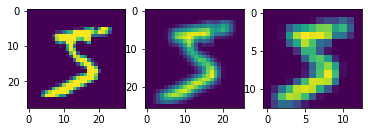

In [39]:
plt.subplot(131)
plt.imshow(xtrain[0])
plt.subplot(132)
plt.imshow(xconv)
plt.subplot(133)
plt.imshow(xmaxpool)